In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

C:\Users\datta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\datta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\datta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\datta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

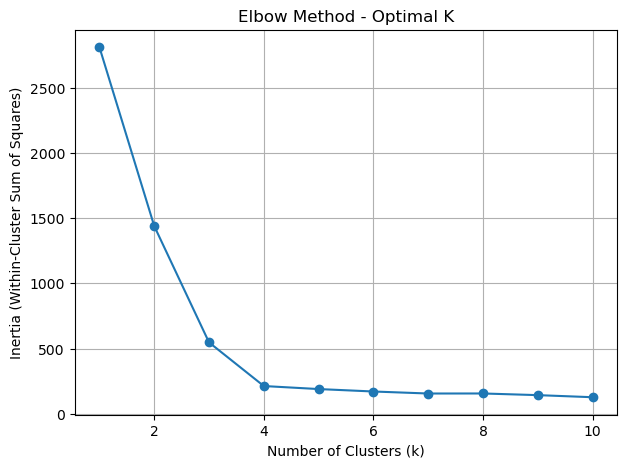

In [4]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# Step 3: Determine the optimal number of clusters (Elbow Method)
inertia = []  # sum of squared distances for each K

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(7,5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method - Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()



C:\Users\datta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


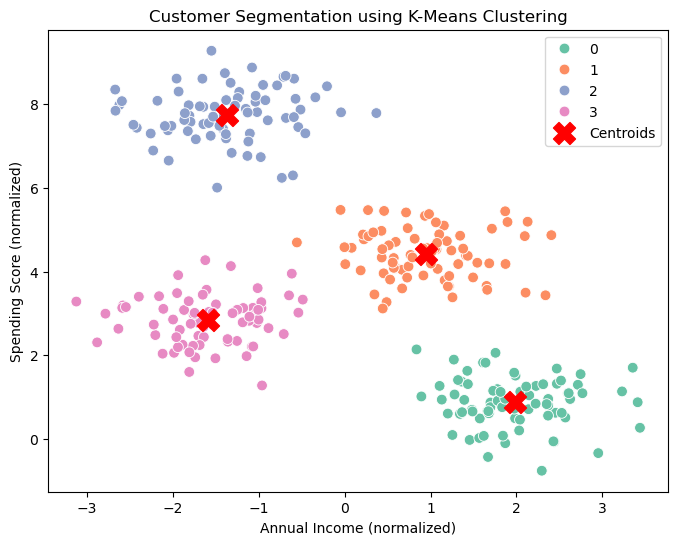

Cluster Centers:
 [[ 1.98258281  0.86771314]
 [ 0.94973532  4.41906906]
 [-1.37324398  7.75368871]
 [-1.58438467  2.83081263]]


In [5]:
# Step 4: Apply K-Means with the optimal K (from elbow graph)
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Step 5: Visualize the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_kmeans, palette='Set2', s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=250, c='red', label='Centroids', marker='X')
plt.title('Customer Segmentation using K-Means Clustering')
plt.xlabel('Annual Income (normalized)')
plt.ylabel('Spending Score (normalized)')
plt.legend()
plt.show()

# Step 6: Display cluster centers
print("Cluster Centers:\n", kmeans.cluster_centers_)
